# ES34
## Noemi Baruffolo 5^AROB
### Dati degli USA sulle sigarette

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import  LabelEncoder
from sklearn.neural_network import MLPClassifier

In [4]:
data = pd.read_csv("csv/data.csv", na_values = [-99999.0])
data.head()

,Year,Entity,Code,Sales of cigarettes per adult per day,age-standardized_death_rate_per_100k_male,age-standardized_death_rate_per_100k_female
0,1900,United States,USA,0.1,NaN,NaN
1,1901,United States,USA,0.1,NaN,NaN
2,1902,United States,USA,0.1,NaN,NaN
3,1903,United States,USA,0.1,NaN,NaN
4,1904,United States,USA,0.2,NaN,NaN


In [6]:
year = data["Year"].to_numpy() #oppure .values
sales = data["Sales of cigarettes per adult per day"].to_numpy()
rateMale = data["age-standardized_death_rate_per_100k_male"].to_numpy()
rateFemale = data["age-standardized_death_rate_per_100k_female"].to_numpy()

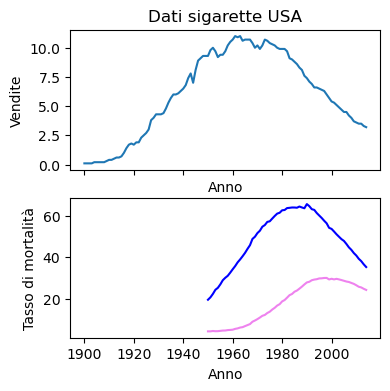

In [26]:
fig, ax = plt.subplots(nrows = 2, figsize = (4, 4), sharex = True) #condivide gli anni nei grafici perché sono uguali
ax[0].plot(year, sales) #se uso np.roll(sales, 20) shifta tutto a destra di 20
ax[0].set_xlabel("Anno")
ax[0].set_ylabel("Vendite")
ax[0].set_title("Dati sigarette USA")
ax[1].plot(year, rateFemale, color = "violet", label = "femmine")
ax[1].plot(year, rateMale, color = "blue", label = "maschi")
ax[1].set_xlabel("Anno")
ax[1].set_ylabel("Tasso di mortalità")
plt.show()

In [ ]:
# creo un dataframe con i valori spostati di 10 e usando i dati dei maschi veri che ho
lag = 20
salesLag = np.roll(sales, lag)
dataLag = pd.DataFrame({"Sales lagged": salesLag, "Rate male": rateMale})
#rimuovo i valori nulli
dataLag.dropna(inplace = True) #usando inplace non devo assegnare
x = dataLag["Sales lagged"].to_numpy() #la x è minuscola perché abbiamo solo una feature
y = dataLag["Rate male"].to_numpy()
model = LinearRegression(fit_intercept =  True)  
model.fit(x.reshape(-1, 1), y)
model.score(x.reshape(-1, 1), y)
r2 = model.score(x.reshape(-1, 1), y)
print(f"{lag} -> {r2}")

20 -> 0.9523599621979915


In [48]:
for lag in range(5, 30):
    salesLag = np.roll(sales, lag)
    dataLag = pd.DataFrame({"Sales lagged": salesLag, "Rate male": rateMale})
    #rimuovo i valori nulli
    dataLag.dropna(inplace = True) #usando inplace non devo assegnare
    x = dataLag["Sales lagged"].to_numpy() #la x è minuscola perché abbiamo solo una feature
    y = dataLag["Rate male"].to_numpy()
    model = LinearRegression(fit_intercept =  True)
    model.fit(x.reshape(-1, 1), y)
    model.score(x.reshape(-1, 1), y)
    r2 = model.score(x.reshape(-1, 1), y)
    print(f"{lag} -> {r2}")

5 -> 0.025490668851077203
6 -> 0.05452378676818048
7 -> 0.08722004529957006
8 -> 0.13200826623555573
9 -> 0.19355886070861628
10 -> 0.26858617209578095
11 -> 0.35316480156825314
12 -> 0.44502057184700095
13 -> 0.5412749079406073
14 -> 0.63453834986617
15 -> 0.7247155006359031
16 -> 0.805384144408176
17 -> 0.8709420368570322
18 -> 0.9142473670162777
19 -> 0.9412683795597212
20 -> 0.9523599621979915
21 -> 0.9467190144883167
22 -> 0.9278052221902825
23 -> 0.899227953172586
24 -> 0.8623099116891824
25 -> 0.8241429132407116
26 -> 0.7830149248547218
27 -> 0.7447620879208229
28 -> 0.7067542629501469
29 -> 0.670663029543896


### Riusciamo a prevedere la mortalità  dal dato delle vendite delle sigarette se laggo le vendite di 20 anni, c'è un acorrelazione tra le vendite di sigaette e le malattie cardiorespiratorie (o polmonari, boh). 
### La regressione è stata usata per fare un'analisi scientifica e non un aprevisione dei dati